In [362]:
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
from sklearn import preprocessing
%matplotlib inline

import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

import tensorflow as tf
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import random
%matplotlib inline
import shutil
import tensorflow.contrib.learn as tflearn
import tensorflow.contrib.layers as tflayers
import tensorflow.contrib.metrics as metrics
import tensorflow.contrib.rnn as rnn

from tensorflow.contrib.learn.python.learn import learn_runner
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 6
pd.options.display.max_columns = 17
pd.options.display.max_rows = 17



In [363]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
demand_data = pd.read_csv('./data/DemandaInfo.csv', parse_dates=['time'], index_col='time',date_parser=dateparse)
demand_ts = demand_data['demand']

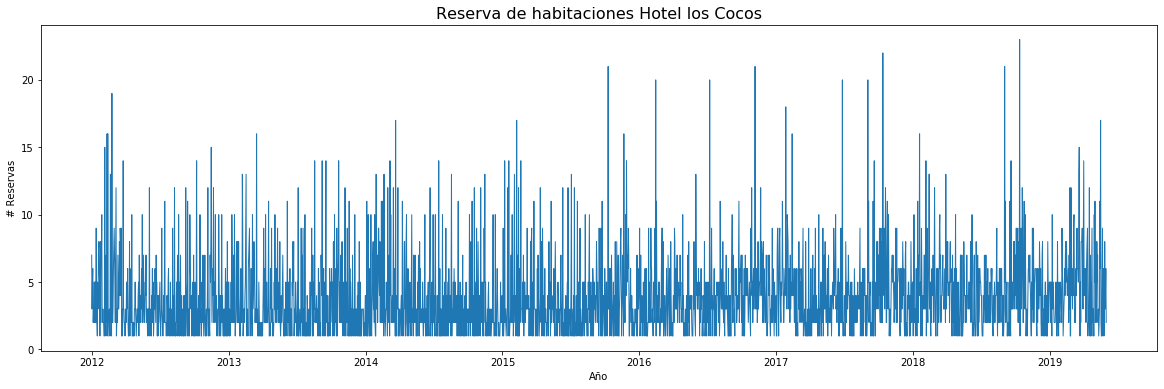

In [364]:
#Plot
plt.plot(demand_ts, linewidth=1)
plt.title(u'Reserva de habitaciones Hotel los Cocos', fontsize=16)
plt.ylabel(u'# Reservas')
plt.xlabel(u'Año')
plt.show()

In [419]:
train = demand_data.iloc[:2555, :1].values
test = demand_data.iloc[2555:, :1].values

In [420]:
train.shape

(2555, 1)

In [421]:
test.shape

(151, 1)

In [422]:
#print(train)

In [423]:
# Como regla general, siempre que use una red neuronal, debe normalizar o escalar sus datos.
# Usaremos la MinMaxScalerclase de la sklear.preprocessing biblioteca para escalar nuestros datos entre 0 y 1.
# El parámetro feature_range se usa para especificar el rango de los datos escalados

In [424]:
from sklearn.preprocessing import MinMaxScaler  
scaler = MinMaxScaler(feature_range = (0, 1))

training_scaled = scaler.fit_transform( train ) 

In [425]:
features_set = []  
labels = []  
for i in range(30, 2555):  
    features_set.append(training_scaled[i-30:i, 0])
    labels.append(training_scaled[i, 0])

In [426]:
#Necesitamos convertir tanto la lista feature_set como la labelslista a la matriz numpy antes de poder usarla para entrenamiento. 
#Ejecuta el siguiente script:

In [427]:
features_set, labels = np.array(features_set), np.array(labels)  

In [428]:
# La primera dimensión es el número de registros o filas en el conjunto de datos que es 2555 
# La segunda dimensión es el número de pasos de tiempo que es 60
# La última dimensión es el número de indicadores

In [429]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))  

In [430]:
# El modelo LSTM que vamos a crear será un modelo secuencial con múltiples capas. 
# Agregaremos cuatro capas LSTM a nuestro modelo, seguidas de una capa densa que predice el precio futuro de las acciones.


In [431]:
from keras.models import Sequential  
from keras.layers import Dense  
from keras.layers import LSTM  
from keras.layers import Dropout  

In [432]:
model = Sequential()  

In [433]:
# Creación de capas LSTM y de deserción

In [434]:
# El primer parámetro de la capa LSTM es el número de neuronas o nodos que queremos en la capa
# El segundo parámetro es return_sequences, que se establece en verdadero ya que agregaremos más capas al modelo
# El primer parámetro input_shapees el número de pasos de tiempo, 
# mientras que el último parámetro es el número de indicadores

In [435]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))  

In [436]:
# La capa de abandono se agrega para evitar el ajuste excesivo, 
# que es un fenómeno en el que un modelo de aprendizaje automático funciona mejor en los datos de entrenamiento 
# en comparación con los datos de prueba

In [437]:
model.add(Dropout(0.2))  

In [438]:
model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))

model.add(LSTM(units=50))  
model.add(Dropout(0.2))  

In [439]:
# Creando Capa Densa
# modelo sea más robusto, agregamos una capa densa al final del modelo
# El número de neuronas en la capa densa se establecerá en 1, ya que queremos predecir un solo valor en la salida.

In [440]:
model.add(Dense(units = 1))  

In [441]:
# Compilación de modelos

In [442]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')  

In [443]:
#Entrenamiento de algoritmos

In [444]:
model.fit(features_set, labels, epochs = 100, batch_size = 32)  

Epoch 1/100
2525/2525 [==============================] - 11s 4ms/step - loss: 0.0202
Epoch 2/100
2525/2525 [==============================] - 6s 3ms/step - loss: 0.0192
Epoch 3/100
2525/2525 [==============================] - 6s 3ms/step - loss: 0.0191
Epoch 4/100
2525/2525 [==============================] - 6s 3ms/step - loss: 0.0191
Epoch 5/100
2525/2525 [==============================] - 6s 3ms/step - loss: 0.0191
Epoch 6/100
2525/2525 [==============================] - 6s 3ms/step - loss: 0.0190
Epoch 7/100
2525/2525 [==============================] - 6s 3ms/step - loss: 0.0188
Epoch 8/100
2525/2525 [==============================] - 6s 3ms/step - loss: 0.0190
Epoch 9/100
2525/2525 [==============================] - 6s 3ms/step - loss: 0.0190
Epoch 10/100
2525/2525 [==============================] - 6s 3ms/step - loss: 0.0188
Epoch 11/100
2525/2525 [==============================] - 6s 3ms/step - loss: 0.0189
Epoch 12/100
2525/2525 [==============================] - 6s 3ms/step - l

2525/2525 [==============================] - 6s 2ms/step - loss: 0.0184
Epoch 98/100
2525/2525 [==============================] - 6s 3ms/step - loss: 0.0185
Epoch 99/100
2525/2525 [==============================] - 6s 3ms/step - loss: 0.0185
Epoch 100/100
2525/2525 [==============================] - 6s 3ms/step - loss: 0.0184


In [445]:
# Primero importemos nuestros datos de prueba

In [446]:
testing_processed = test

In [447]:
test.shape

(151, 1)

In [448]:
#Convertir datos de prueba a formato correcto

In [449]:
total = demand_data['demand']

In [450]:
total.shape

(2706,)

In [451]:
test_inputs = total[len(total) - len(test) - 30:].values  

In [455]:
test_inputs.shape

(181,)

In [456]:
test_inputs = test_inputs.reshape(-1,1)  
test_inputs = scaler.transform(test_inputs)  

In [457]:
test_inputs.shape

(181, 1)

In [464]:
test_features = []  
for i in range(30, 181):  
    test_features.append(test_inputs[i-30:i, 0])

In [465]:
#test_features.shape

In [466]:
test_features = np.array(test_features)  
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))  

In [467]:
test_features.shape

(151, 30, 1)

In [468]:
predictions = model.predict(test_features)

In [469]:
predictions.shape

(151, 1)

In [470]:
predictions = scaler.inverse_transform(predictions) 

In [471]:
predictions.shape

(151, 1)

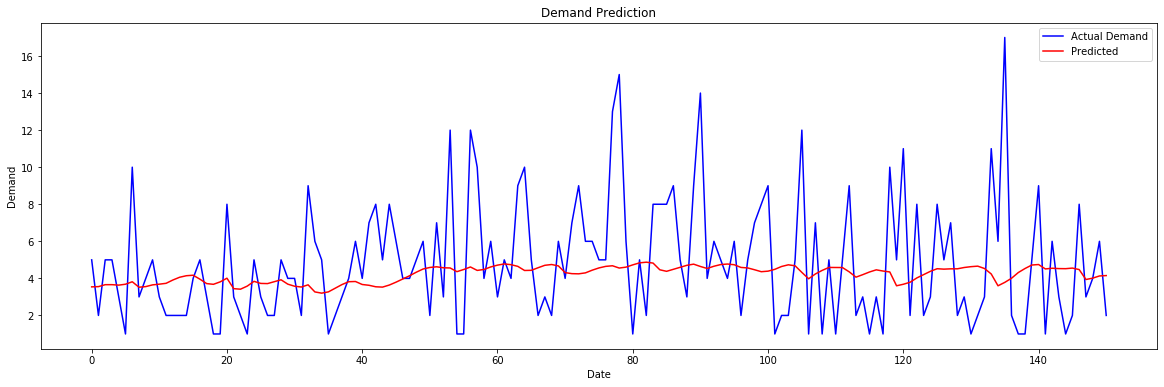

In [472]:
plt.figure(figsize=(20,6))  
plt.plot(testing_processed, color='blue', label='Actual Demand')  
plt.plot(predictions , color='red', label='Predicted')  
plt.title('Demand Prediction')  
plt.xlabel('Date')  
plt.ylabel('Demand')  
plt.legend()  
plt.show() 

In [473]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from math import sqrt

In [474]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(testing_processed,predictions)

81.90509473929541

In [475]:
median_absolute_error(testing_processed,predictions)

2.0066537857055664

In [476]:
mean_absolute_error(testing_processed,predictions)

2.488627002728696

In [477]:
mean_squared_error(testing_processed,predictions)

10.71484040412276

In [478]:
sqrt( mean_squared_error(testing_processed,predictions) )

3.2733530827154533